<a href="https://colab.research.google.com/github/RedDevilMRK/MLA2021/blob/main/Maitreya_Khanapurkar__Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **HR
 **

In [1]:
import pandas as pd
import numpy as np

In [2]:
HR_df = pd.read_csv( "https://raw.githubusercontent.com/RedDevilMRK/PYTHON/main/HR_comma_sep.csv" )
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
HR_df.iloc[0:5,1:7]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,0.53,2,157,3,0,1
1,0.86,5,262,6,0,1
2,0.88,7,272,4,0,1
3,0.87,5,223,5,0,1
4,0.52,2,159,3,0,1


In [4]:
HR_df.iloc[0:5,7:]

,promotion_last_5years,Department,salary
0,0,sales,low
1,0,sales,medium
2,0,sales,medium
3,0,sales,low
4,0,sales,low


In [5]:
HR_df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [6]:
HR_df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [7]:
HR_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
X_features = list( HR_df.columns )
X_features.remove('promotion_last_5years')
X_features.remove ('Work_accident')
X_features.remove('left')
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Department',
 'salary']

**Encoding Categorical Features**

In [9]:
encoded_HR_df = pd.get_dummies( HR_df[X_features],
drop_first = True )

In [10]:
list(encoded_HR_df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [11]:
encoded_HR_df[['Department_hr','Department_accounting','Department_management'
,'Department_marketing','Department_product_mng','Department_sales','Department_support'
,'Department_technical','Department_RandD']].head()

,Department_hr,Department_accounting,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Department_RandD
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [12]:
import statsmodels.api as sm
Y = HR_df.left
X = sm.add_constant( encoded_HR_df )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Splitting into Train and Validation Sets**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 42)

**Building Logistic Regression Model**

In [14]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.439545
         Iterations 7


**Printing Model Summary**

In [15]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit              Pseudo R-squared:   0.199    
Dependent Variable:    left               AIC:                9263.5679
Date:                  2021-09-01 09:41   BIC:                9386.9715
No. Observations:      10499              Log-Likelihood:     -4614.8  
Df Model:              16                 LL-Null:            -5761.7  
Df Residuals:          10482              LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                  -1.8472   0.2295  -8.0497 0.0000 -2.2969 -1.3974
satisfaction_level     -4.1845   0.1155 -36.2169 0.0000 -4.4110 -3.9581
last_evaluation         0.6211   0.1752   3.5447 0.0004  0.2777  0.9646
number_project         -0.2939   0.0249 -11.7987 0.0000 -0.3427 -0.2451
average_montly_hours    0.0048   0.0006   7.8810 0.0000  0.0036  0.0060
time_spend_company      0.2436   0.0181  13.4610 0.0000  0.2081  0.2791
Department_RandD       -0.6326   0.1647  -3.8420 0.0001 -0.9554 -0.3099
Department_accounting   0.2158   0.1447   1.4909 0.1360 -0.0679  0.4994
Department_hr           0.4218   0.1458   2.8940 0.0038  0.1362  0.7075
Department_management  -0.3503   0.1751  -2.0005 0.0454 -0.6936 -0.0071
Department_marketing    0.2046   0.1438   1.4225 0.1549 -0.0773  0.4864
Department_product_mng  0.1191   0.1383   0.8610 0.3892 -0.1520  0.3901
Department_sales        0.1271   0.1056   1.2033 0.2288 -0.0799  0.3342
Department_support      0.1323   0.1158   1.1422 0.2534 -0.0947  0.3593
Department_technical    0.2447   0.1115   2.1944 0.0282  0.0261  0.4632
salary_low              2.0372   0.1583  12.8710 0.0000  1.7270  2.3474
salary_medium           1.5151   0.1590   9.5271 0.0000  1.2034  1.8268
=======================================================================

"""

**Model Dignostics**

In [16]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [17]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Department_RandD',
 'Department_hr',
 'Department_management',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [18]:
final_logit = sm.Logit( y_train,
sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.439689
         Iterations 7


In [19]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.199    
Dependent Variable:   left               AIC:                9256.5854
Date:                 2021-09-01 09:41   BIC:                9343.6939
No. Observations:     10499              Log-Likelihood:     -4616.3  
Df Model:             11                 LL-Null:            -5761.7  
Df Residuals:         10487              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.7139   0.2105  -8.1436 0.0000 -2.1263 -1.3014
satisfaction_level    -4.1869   0.1155 -36.2498 0.0000 -4.4133 -3.9606
last_evaluation        0.6190   0.1751   3.5350 0.0004  0.2758  0.9623
number_project        -0.2940   0.0249 -11.8050 0.0000 -0.3428 -0.2452
average_montly_hours   0.0048   0.0006   7.8739 0.0000  0.0036  0.0060
time_spend_company     0.2440   0.0181  13.5071 0.0000  0.2086  0.2794
Department_RandD      -0.7591   0.1389  -5.4659 0.0000 -1.0313 -0.4869
Department_hr          0.2955   0.1158   2.5518 0.0107  0.0685  0.5225
Department_management -0.4776   0.1510  -3.1622 0.0016 -0.7736 -0.1816
Department_technical   0.1184   0.0678   1.7457 0.0809 -0.0145  0.2513
salary_low             2.0335   0.1581  12.8579 0.0000  1.7235  2.3434
salary_medium          1.5113   0.1589   9.5093 0.0000  1.1998  1.8228
======================================================================

"""

**Predicting on Test Data**

In [20]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": final_logit.predict(
sm.add_constant( X_test[significant_vars] ) ) } )

In [22]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
13995,0,0.019706,0
4442,0,0.245814,0
8091,0,0.153388,0
9822,0,0.030663,0
6151,0,0.365633,0
6282,0,0.035061,0
511,1,0.510831,1
11024,0,0.132012,0
3980,0,0.105325,0
4229,0,0.096444,0


In [21]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
13995,0,0.019706,0
4442,0,0.245814,0
8091,0,0.153388,0
9822,0,0.030663,0
6151,0,0.365633,0
6282,0,0.035061,0
511,1,0.510831,1
11024,0,0.132012,0
3980,0,0.105325,0
4229,0,0.096444,0


**Creating a Confusion Matrix**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [24]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Left", "Not Left"] ,
                yticklabels = ["Left", "Not Left"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

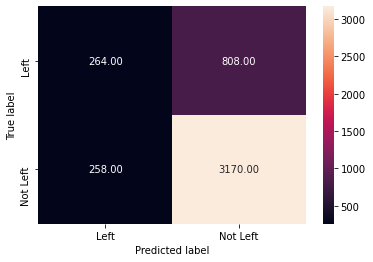

In [25]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

**Measuring Accuracies**

In [26]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3428
           1       0.51      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.59      4500
weighted avg       0.73      0.76      0.73      4500



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


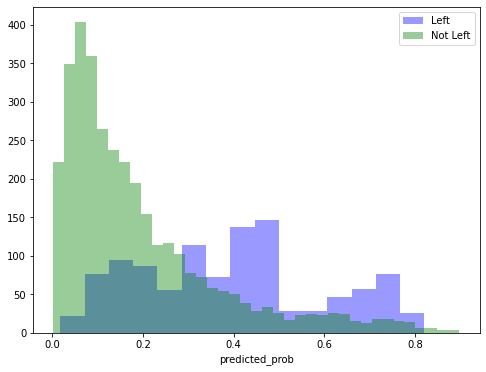

In [27]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Left' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Not Left' )
plt.legend()
plt.show()

**ROC & AUC**

In [28]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

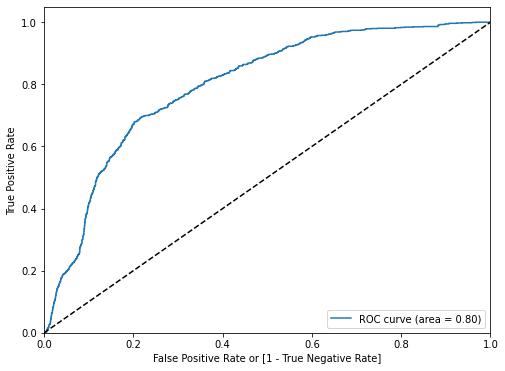

In [29]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
y_pred_df.predicted_prob)

In [30]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.8

**Finding Optimal Cutoff**
 
 Youden's index

In [31]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                          'fpr': fpr,
                          'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
1322,0.695896,0.218495,0.281006,0.477401
1253,0.679104,0.201867,0.292079,0.477237
1310,0.693097,0.215869,0.282726,0.477228
1323,0.695896,0.218786,0.280915,0.477109
1254,0.679104,0.202159,0.291858,0.476946


In [32]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.22 else 0)

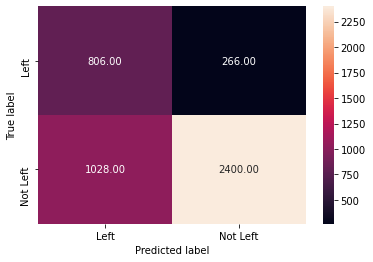

In [33]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_new)

In [34]:
print(metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      3428
           1       0.44      0.75      0.55      1072

    accuracy                           0.71      4500
   macro avg       0.67      0.73      0.67      4500
weighted avg       0.79      0.71      0.73      4500

